In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
nw = pd.read_csv(r'C:\Users\benha\Downloads\diabetes.csv')
nw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
nw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
nw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
nw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
nw.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


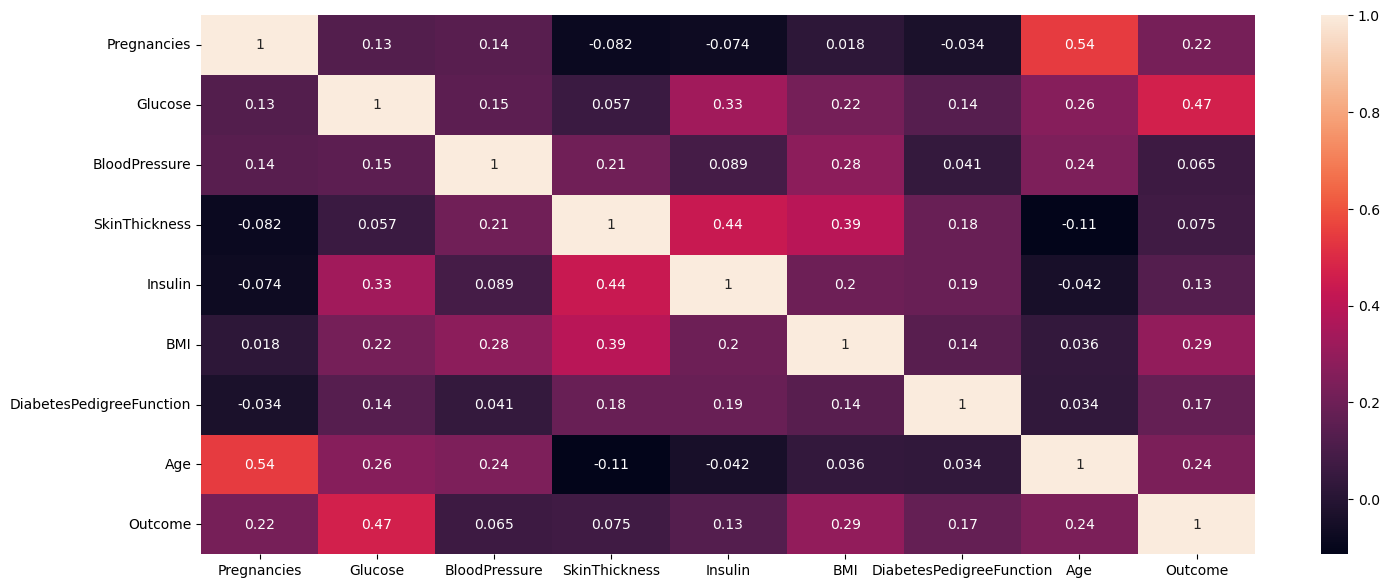

In [23]:
plt.figure(figsize=(17,7))
sns.heatmap(data=nw.corr(),annot=True)
plt.show()

In [25]:
col_val = ('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome')

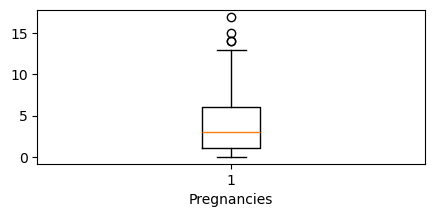

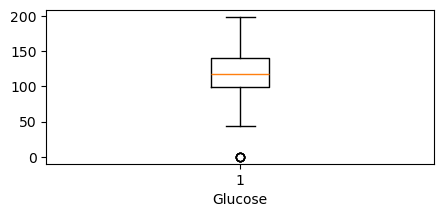

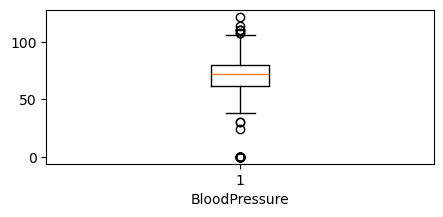

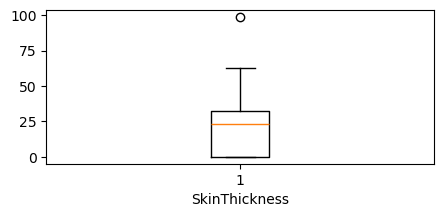

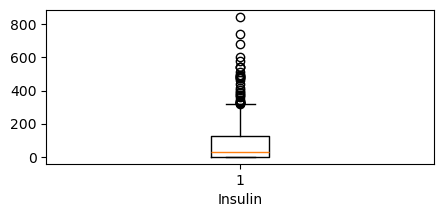

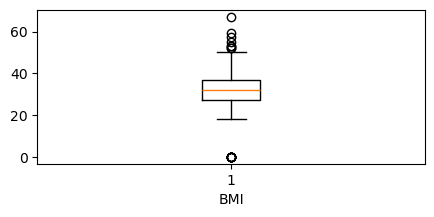

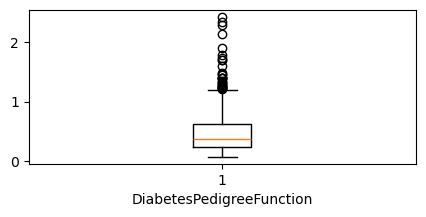

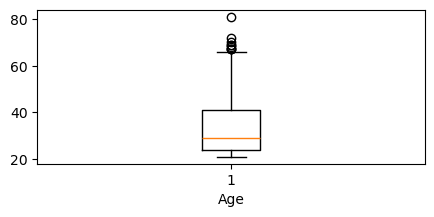

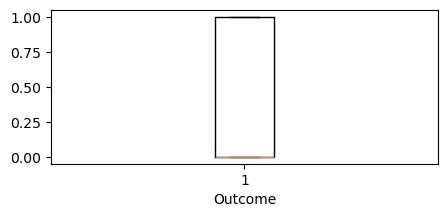

In [27]:
for i,col in enumerate(col_val,start=0):
    plt.figure(figsize=(5,2)) 
    plt.boxplot(nw[col])
    plt.xlabel(col)
    plt.show()

In [29]:
nw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
def remove_outliers(nw,cols):
    for col in cols:
        Q1= nw[col].quantile(0.25)
        Q3= nw[col].quantile(0.75)
        IQR = Q3-Q1
        lb = Q1- IQR*1.5
        ub = Q3+IQR*1.5
        nw = nw[(nw[col] >= lb) & (nw[col] <= ub)]
    return nw

In [33]:
nw = remove_outliers(nw,col_val)

In [35]:
nw.shape

(636, 9)

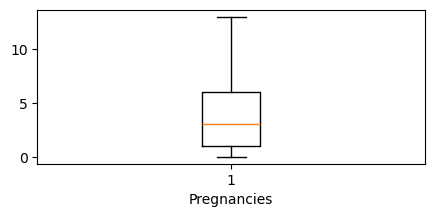

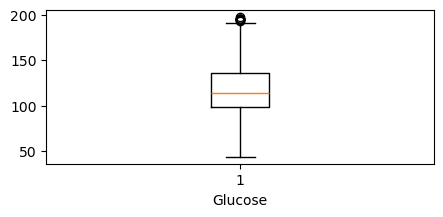

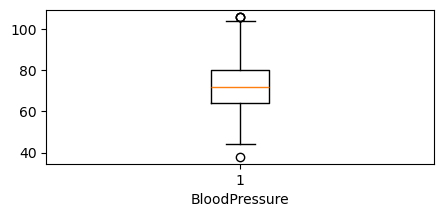

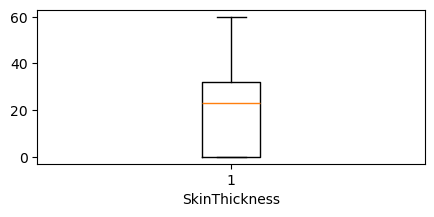

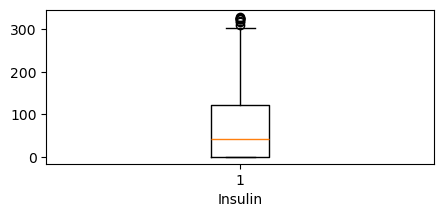

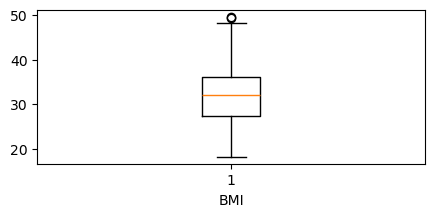

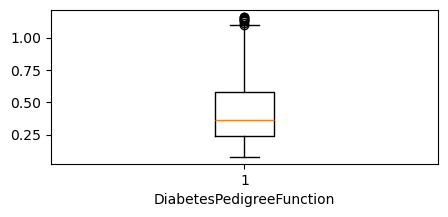

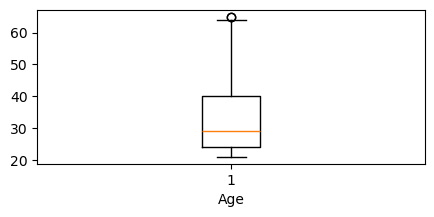

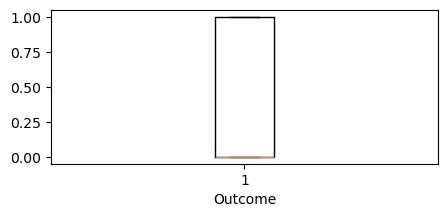

In [141]:
for i,col in enumerate(col_val,start=0):
    plt.figure(figsize=(5,2)) 
    plt.boxplot(nw[col])
    plt.xlabel(col)
    plt.show()

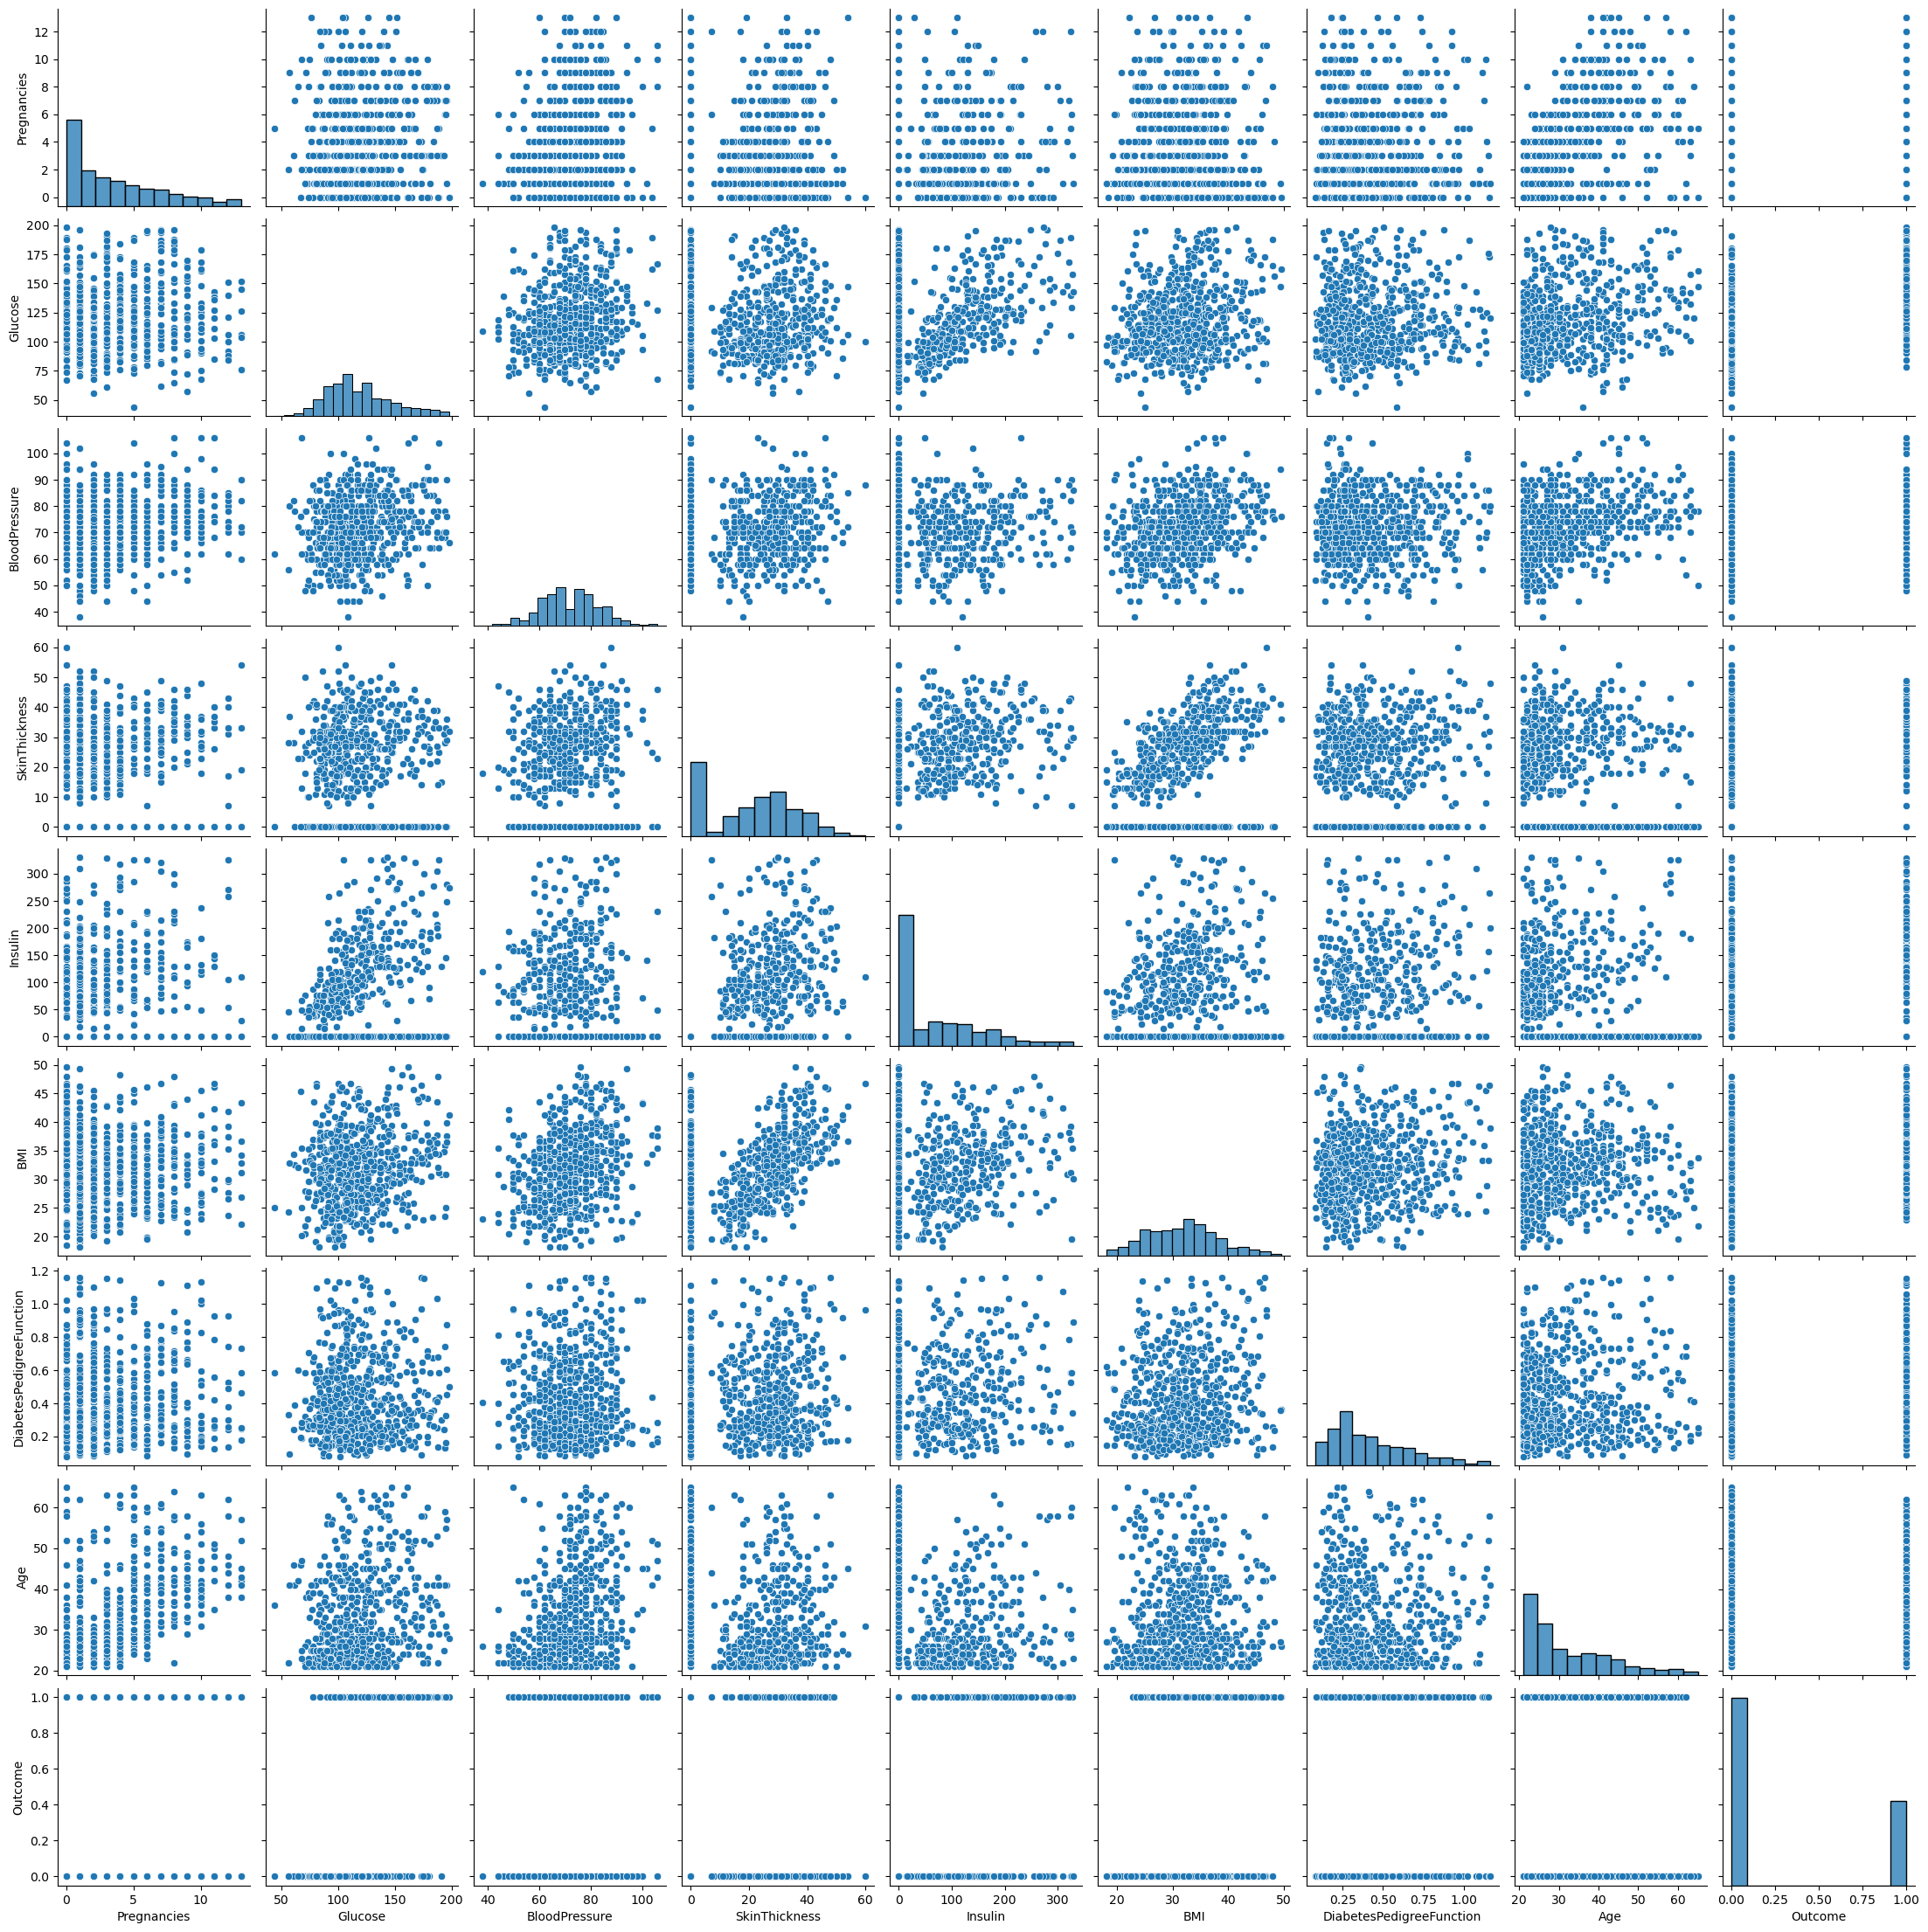

In [37]:
sns.pairplot(nw)

In [38]:
nw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [39]:
nw['Outcome'].value_counts()

Outcome
0    439
1    197
Name: count, dtype: int64

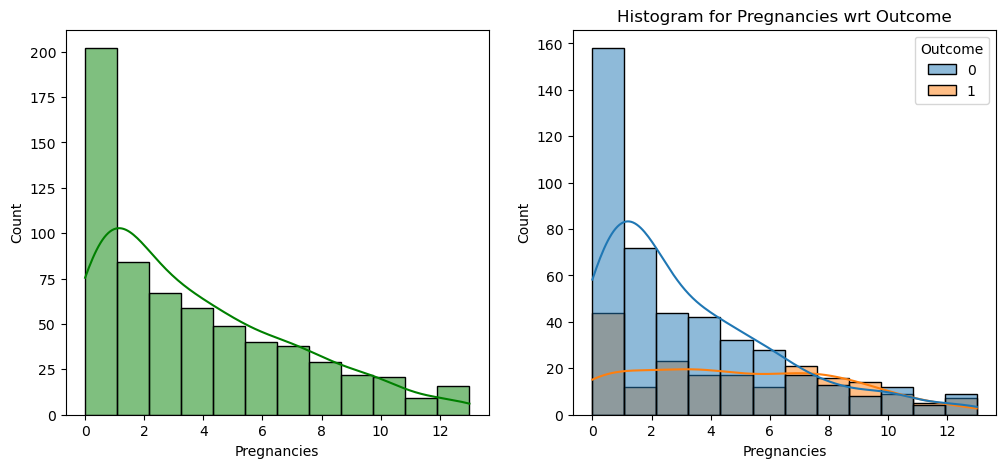

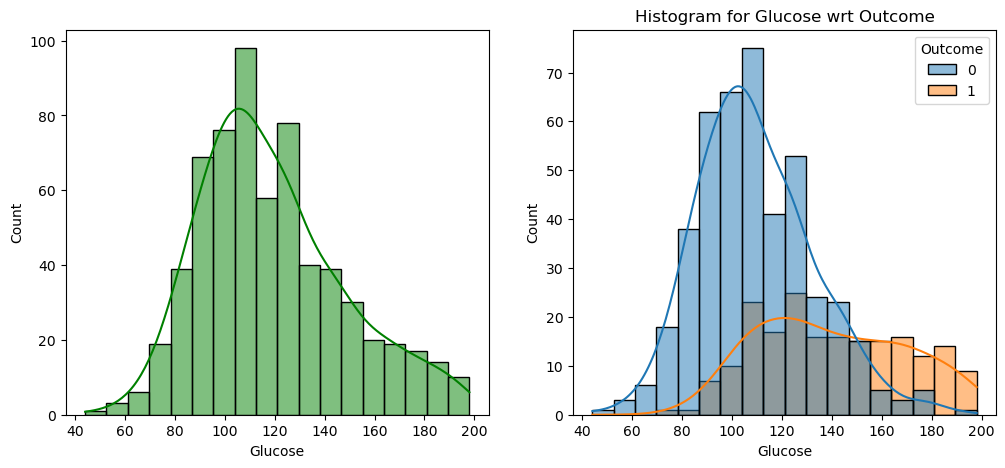

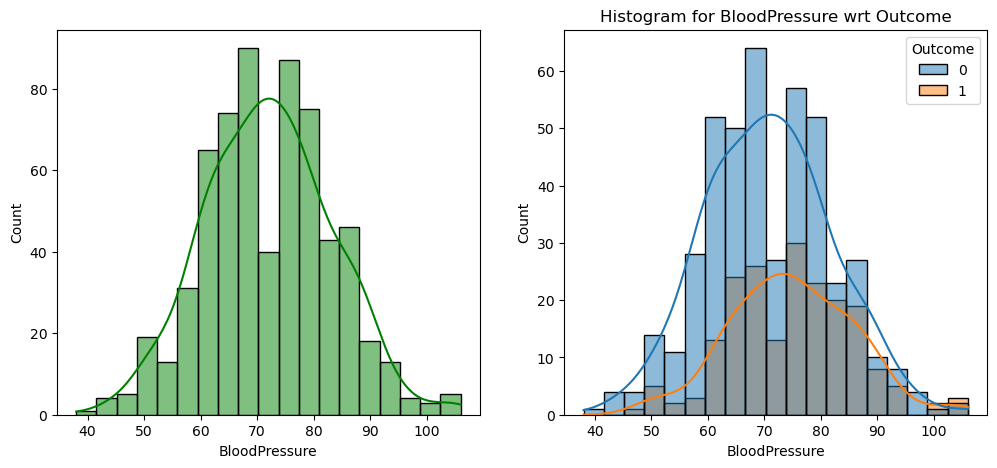

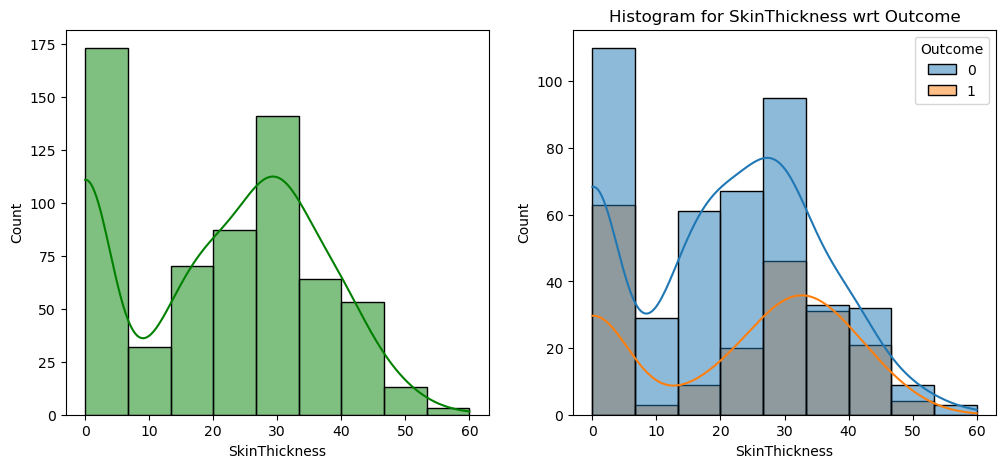

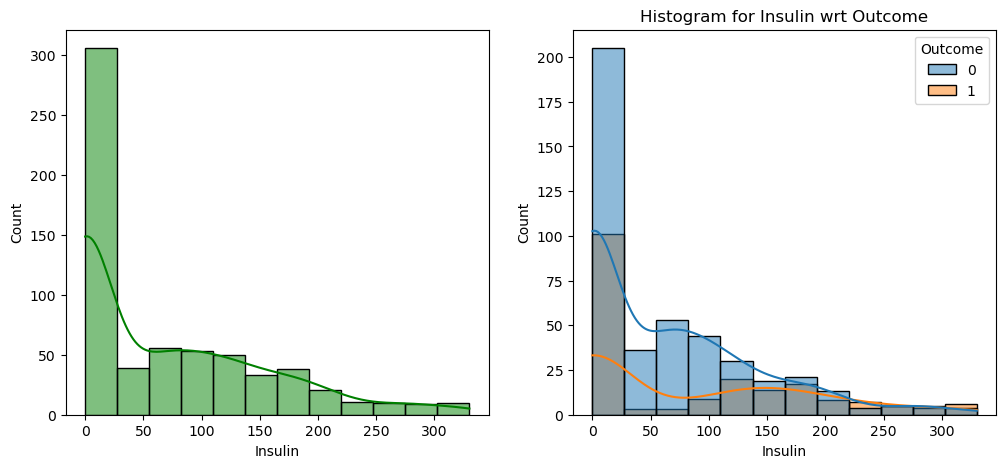

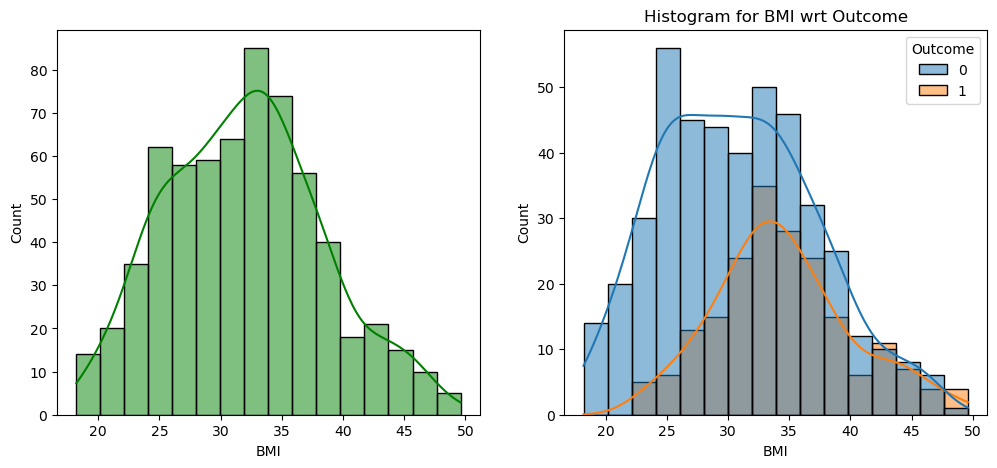

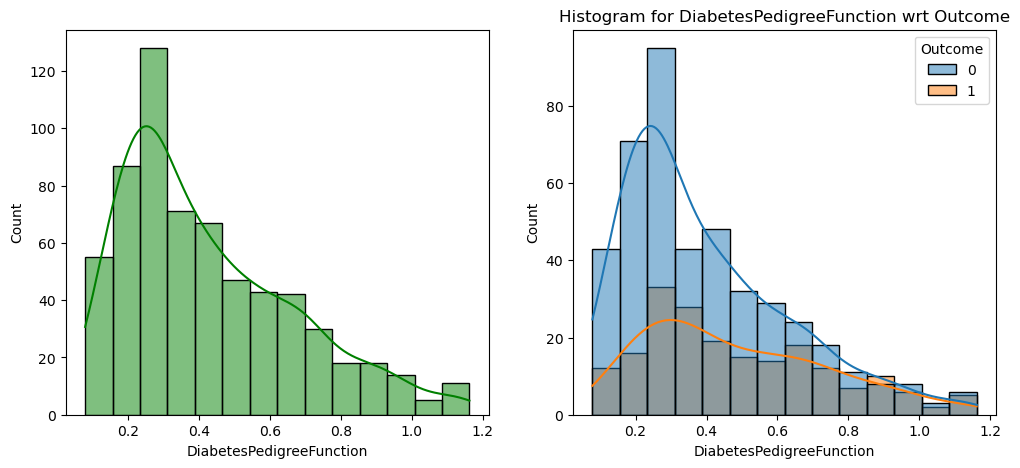

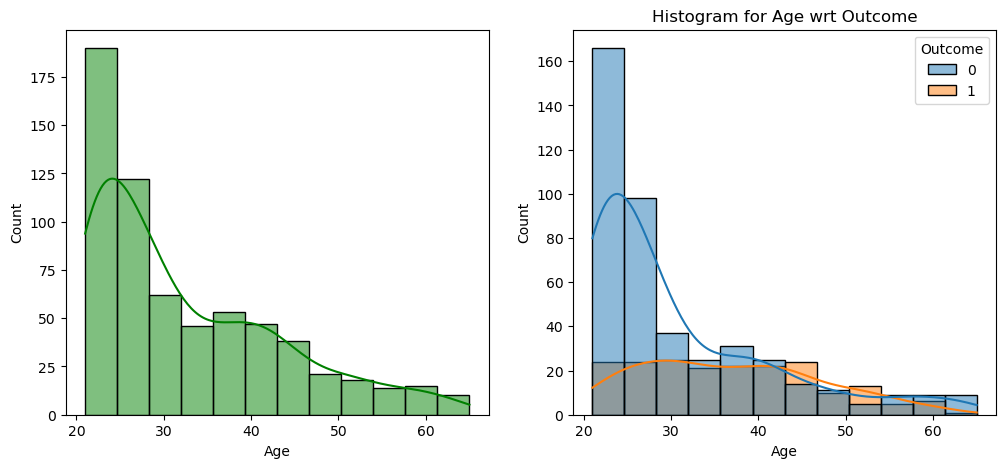

In [43]:
for i in nw.columns:
    if i!='Outcome':
        fig,ax= plt.subplots(1,2,figsize=(12,5))
        plt.subplot(121)
        sns.histplot(data=nw,kde=True,x=i,color='g',bins='fd')
        plt.subplot(122)
        sns.histplot(data=nw,x=i,kde=True,bins='fd',hue='Outcome')
        plt.title(f'Histogram for {i} wrt Outcome')
        plt.show()

In [45]:
x = nw.iloc[:,:-1]
y = nw["Outcome"]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=40,test_size=0.33)

In [49]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,15)),
    'max_features':['sqrt','log2']
}

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier,param_grid=parameters,cv=5,scoring = 'accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [52]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [55]:
model = DecisionTreeClassifier(**clf.best_params_)

In [57]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='sqrt',
                       splitter='random')

In [59]:
y_pred=model.predict(x_test)

In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [63]:
acc_test = accuracy_score(y_pred,y_test)
print(f'Accuracy Score for test data is {acc_test}')

Accuracy Score for test data is 0.6761904761904762


In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79       195
           1       0.16      0.80      0.26        15

    accuracy                           0.68       210
   macro avg       0.57      0.73      0.53       210
weighted avg       0.92      0.68      0.75       210



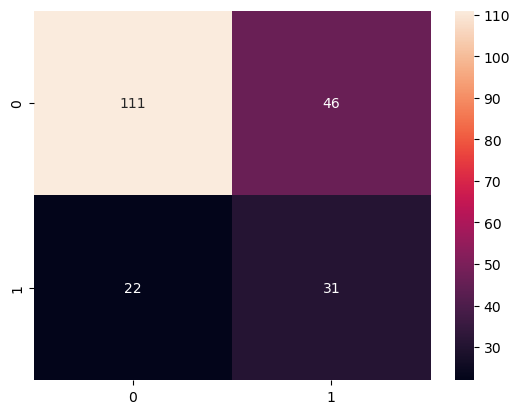

In [189]:
cf = confusion_matrix(y_pred, y_test)
sns.heatmap(cf, annot=True,fmt='d')
plt.show()

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [69]:
roc_auc = auc(fpr,tpr)

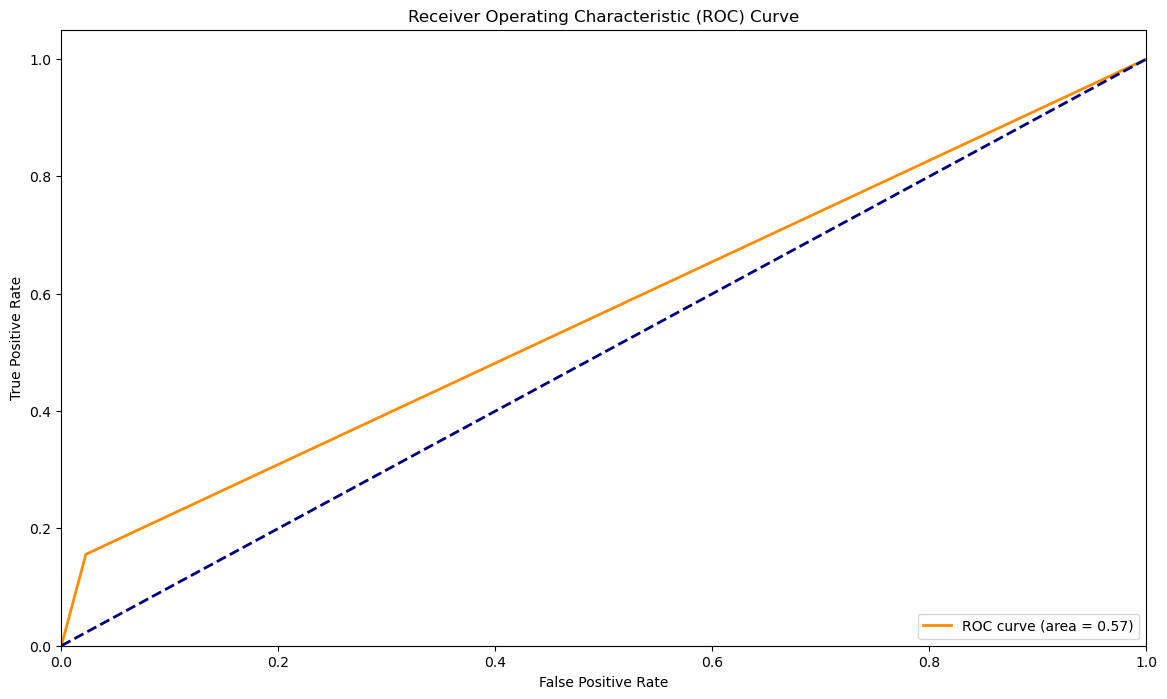

In [75]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0, 1.0])        
plt.ylim([0.0, 1.05])      
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')   
plt.title('Receiver Operating Characteristic (ROC) Curve')  
plt.legend(loc='lower right')     

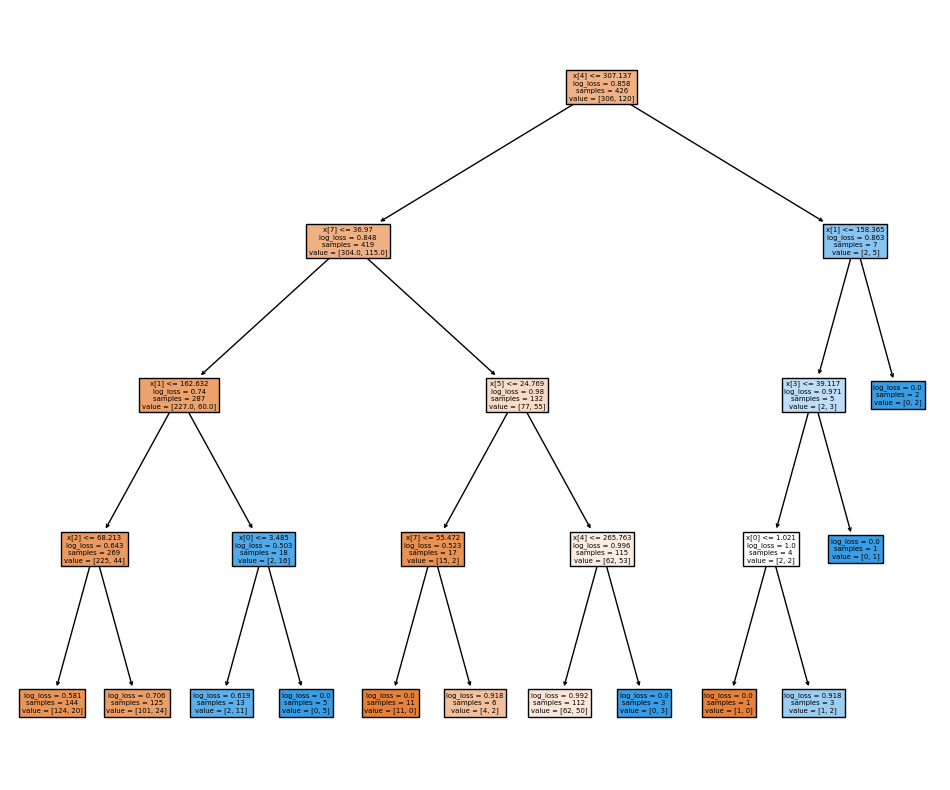

In [77]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)
plt.show()

In [79]:
imp = model.feature_importances_
imp = pd.Series(imp)
imp.index = x_train.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.476715
Age                         0.256735
Insulin                     0.114241
BMI                         0.090289
Pregnancies                 0.034068
BloodPressure               0.015020
SkinThickness               0.012932
DiabetesPedigreeFunction    0.000000
dtype: float64

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
new_data = [6,120,22,35,120,18.4,0.90,45]
y_pred = model.predict([new_data])

In [101]:
y_pred[0]

0

In [103]:
if y_pred[0] == 1:
    print("Diabetic")
else :
    print("Not Diabetic")

Not Diabetic
